In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder

import statsmodels.api as sm
from statsmodels.formula.api import ols


import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import os


## Reading the data

In [2]:
file1 = pd.read_csv('fifa21_male2.csv')

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
file1.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [4]:
file1.describe()

,ID,Age,OVA,BOV,POT,Growth,Attacking,Crossing,Finishing,Heading Accuracy,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,...,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,219388.716204,25.272934,66.965022,67.900204,72.489810,5.524788,258.537752,51.621314,47.956672,53.598832,...,15.514277,15.738628,1631.256175,361.372146,68.091620,54.967299,58.926540,64.209869,50.266102,64.910715
std,37499.197507,4.942665,6.864329,6.637538,5.769949,5.787539,72.255687,17.875715,19.391547,16.947164,...,16.406064,17.130908,260.357024,40.252290,11.147116,13.877605,10.186728,9.832734,16.853801,9.660260
min,2.000000,16.000000,38.000000,42.000000,47.000000,-1.000000,33.000000,6.000000,3.000000,5.000000,...,1.000000,1.000000,731.000000,228.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000
25%,204082.000000,21.000000,62.000000,64.000000,69.000000,0.000000,232.000000,41.000000,33.000000,46.000000,...,8.000000,8.000000,1492.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000
50%,228961.000000,25.000000,67.000000,68.000000,72.000000,4.000000,271.000000,56.000000,52.000000,57.000000,...,11.000000,11.000000,1659.000000,362.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000
75%,243911.000000,29.000000,72.000000,72.000000,76.000000,9.000000,306.000000,65.000000,64.000000,65.000000,...,14.000000,14.000000,1812.000000,390.000000,75.000000,65.000000,66.000000,71.000000,64.000000,72.000000
max,259105.000000,53.000000,93.000000,93.000000,95.000000,26.000000,437.000000,94.000000,95.000000,93.000000,...,93.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,93.000000


In [5]:
file1.columns = [col.lower().replace(' ','_') for col in file1.columns]
file1.columns

Index(['id', 'name', 'age', 'ova', 'nationality', 'club', 'bov', 'bp',
       'position', 'player_photo',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'gender'],
      dtype='object', length=107)

In [6]:
file1 = file1.drop_duplicates()

In [7]:
file1['w/f'] = file1['w/f'].apply(lambda x: float(str(x).replace('★', '')))
file1['sm'] = file1['sm'].apply(lambda x: float(str(x).replace('★', '')))
file1['ir'] = file1['ir'].apply(lambda x: float(str(x).replace('★', '')))

In [8]:
file1['height'] = file1['height'].apply(lambda x: str(x).replace("'", '.'))
file1['height'] = file1['height'].apply(lambda x: float(str(x).replace('"', '')))

file1['weight'] = file1['weight'].apply(lambda x: float(str(x).replace('lbs', '')))



In [9]:
file1['height'] = file1['height'].apply(lambda x: x*0.3048)
file1['weight'] = file1['weight'].apply(lambda x: x*0.453)

In [10]:
file1['joined'] = pd.to_datetime(file1['joined'])
file1['joined_year'] = file1['joined'].dt.strftime('%Y')

In [11]:
file1['hits'] = file1['hits'].apply(lambda x: str(x).replace('.', ''))
file1['hits'] = file1['hits'].apply(lambda x: float(str(x).replace('K', '00')))

In [12]:
def conv (x):
    if x.endswith('K'):
        return 1000
    elif x.endswith('M'):
        return 1000000
    else:
        return 1

file1['value_multiplier'] = file1['value'].apply(conv)
file1['wage_multiplier'] = file1['wage'].apply(conv)
file1['release_clause_multiplier'] = file1['release_clause'].apply(conv)

In [13]:
file1['value'] = file1['value'].apply(lambda x: float(str(x).replace('€', '').replace('K', '').replace('M', '')))
file1['wage'] = file1['wage'].apply(lambda x: float(str(x).replace('€', '').replace('K', '').replace('M', '')))
file1['release_clause'] = file1['release_clause'].apply(lambda x: float(str(x).replace('€', '').replace('K', '').replace('M', '')))

In [14]:
file1['value'] = (file1['value']*file1['value_multiplier'])/1000000
file1['wage'] = (file1['wage']*file1['wage_multiplier'])/1000
file1['release_clause'] = (file1['release_clause']*file1['release_clause_multiplier'])/1000000

file1 = file1.rename(columns={'value':'value_M', 'wage':'wage_K', 'release_clause': 'release_clause_M'})

In [15]:
for column in file1.select_dtypes(np.number).columns:
    file1[column] = file1[column].fillna(file1[column].median())

In [16]:
for column in file1.select_dtypes(object).columns:
    file1[column] = file1[column].fillna(file1[column].mode())

In [17]:

file1.isna().sum().sort_values(ascending=False)

loan_date_end                16214
position                       413
d/w                             89
a/w                             89
joined                          58
                             ...  
acceleration                     0
movement                         0
ball_control                     0
long_passing                     0
release_clause_multiplier        0
Length: 111, dtype: int64

In [18]:
file1['d/w'] = file1['d/w'].fillna('Medium')
file1['a/w'] = file1['a/w'].fillna('Medium')
file1['club'] = file1['club'].fillna('Unknown')
file1['joined_year'] = file1['joined_year'].fillna(2019)

In [19]:
mvp= file1.sort_values(by=['value_M'], ascending=False).head(5)
mvp

,id,name,age,ova,nationality,club,bov,bp,position,player_photo,...,lcb,cb,rcb,rb,gk,gender,joined_year,value_multiplier,wage_multiplier,release_clause_multiplier
9331,231747,K. Mbappé,21,90,France,Paris Saint-Germain,91,ST,ST LW RW,https://cdn.sofifa.com/players/231/747/20_120.png,...,55+3,55+3,55+3,63+3,18+3,Male,2018,1000000,1000,1000000
2650,190871,Neymar Jr,28,91,Brazil,Paris Saint-Germain,91,LW,LW CAM,https://cdn.sofifa.com/players/190/871/20_120.png,...,49+3,49+3,49+3,62+3,20+3,Male,2017,1000000,1000,1000000
2871,192985,K. De Bruyne,29,91,Belgium,Manchester City,91,CAM,CAM CM,https://cdn.sofifa.com/players/192/985/20_120.png,...,69+3,69+3,69+3,75+3,21+3,Male,2015,1000000,1000,1000000
2287,188545,R. Lewandowski,31,91,Poland,FC Bayern München,91,ST,ST,https://cdn.sofifa.com/players/188/545/20_120.png,...,60+3,60+3,60+3,61+3,19+3,Male,2014,1000000,1000,1000000
5030,208722,S. Mané,28,90,Senegal,Liverpool,90,LW,LW,https://cdn.sofifa.com/players/208/722/20_120.png,...,59+3,59+3,59+3,66+3,20+3,Male,2016,1000000,1000,1000000


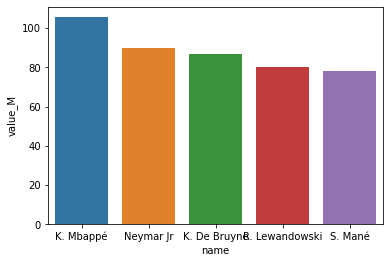

In [20]:
sns.barplot(x='name', y ="value_M", data = mvp)
plt.show()

In [21]:
file1_values= file1[['name','age','ova','position','value_M','value_multiplier','pot']]

In [22]:
file1_values['value_M']

0        0.625
1        0.600
2        1.100
3        0.000
4        5.500
         ...  
17120    0.550
17121    0.130
17122    0.130
17123    0.475
17124    0.325
Name: value_M, Length: 17125, dtype: float64

In [23]:
file1_values["valuet"] = file1_values["value_M"] * file1_values["value_multiplier"]

/var/folders/yx/klzfj4v93f7_qclrmhxryt3r0000gn/T/ipykernel_4224/492180823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file1_values["valuet"] = file1_values["value_M"] * file1_values["value_multiplier"]


In [24]:
file1_values.head()

,name,age,ova,position,value_M,value_multiplier,pot,valuet
0,G. Pasquale,33,69,LM,0.625,1000,69,625.0
1,Luis García,37,71,CM CAM CDM,0.600,1000,71,600.0
2,J. Cole,33,71,CAM RM RW LM,1.100,1000000,71,1100000.0
3,D. Yorke,36,68,NaN,0.000,1,82,0.0
4,Iniesta,36,81,CM CAM,5.500,1000000,81,5500000.0


# Most valuable players and the difference of what the club is willing to pay

In [25]:
file1_values= file1_values.drop('value_M', axis=1)

In [26]:
file1_values = file1_values.drop('value_multiplier', axis=1)

In [27]:
mvp= file1_values.sort_values(by=['valuet'], ascending=False).head(5)
mvp

,name,age,ova,position,pot,valuet
9331,K. Mbappé,21,90,ST LW RW,95,105500000.0
2650,Neymar Jr,28,91,LW CAM,91,90000000.0
2871,K. De Bruyne,29,91,CAM CM,91,87000000.0
2287,R. Lewandowski,31,91,ST,91,80000000.0
5030,S. Mané,28,90,LW,90,78000000.0


In [28]:
mvp['residual']=mvp['valuet']-800000
mvp.head()

,name,age,ova,position,pot,valuet,residual
9331,K. Mbappé,21,90,ST LW RW,95,105500000.0,104700000.0
2650,Neymar Jr,28,91,LW CAM,91,90000000.0,89200000.0
2871,K. De Bruyne,29,91,CAM CM,91,87000000.0,86200000.0
2287,R. Lewandowski,31,91,ST,91,80000000.0,79200000.0
5030,S. Mané,28,90,LW,90,78000000.0,77200000.0


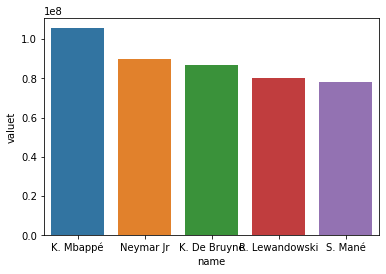

In [29]:
sns.barplot(x='name', y ="valuet", data = mvp)
plt.show()

In [30]:
mvp= file1_values.sort_values(by=['ova'], ascending=False).head(5)

mvp['residual']=mvp['valuet']-800000
mvp

,name,age,ova,position,pot,valuet,residual
752,L. Messi,33,93,RW ST CF,93,67500000.0,66700000.0
142,Cristiano Ronaldo,35,92,ST LW,92,46000000.0,45200000.0
2871,K. De Bruyne,29,91,CAM CM,91,87000000.0,86200000.0
2287,R. Lewandowski,31,91,ST,91,80000000.0,79200000.0
2650,Neymar Jr,28,91,LW CAM,91,90000000.0,89200000.0


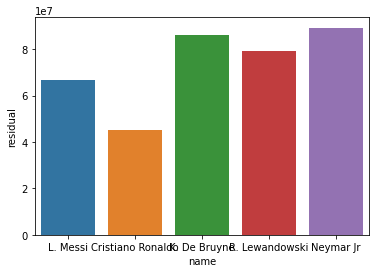

In [31]:
sns.barplot(x='name', y ="residual", data = mvp)
plt.show()

# OVA  BEST PLAYERS CONSIDERING BUDGET

In [32]:
df = file1_values[file1_values['valuet'].between(625, 800.0)]
players_w_pay_range = df.sort_values(by=['ova'],ascending=False).head(5)
players_w_pay_range

,name,age,ova,position,pot,valuet
129,D. Van Buyten,35,78,CB,78,650.0
336,Juninho,38,77,CAM CM,77,625.0
576,Diego López,38,76,GK,76,775.0
147,L. Toni,38,76,ST,76,650.0
209,S. Proto,37,75,GK,75,675.0


In [33]:
#CONSIDERING VALUE (K)

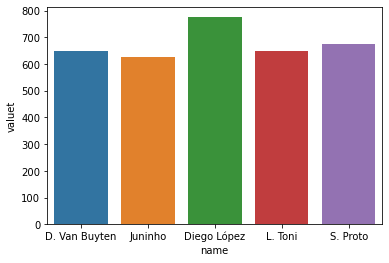

In [34]:
sns.barplot(x='name', y ="valuet", data = players_w_pay_range)
plt.show()

In [35]:
#CONSIDERING OVA WITHIN THE VALUE RANGE

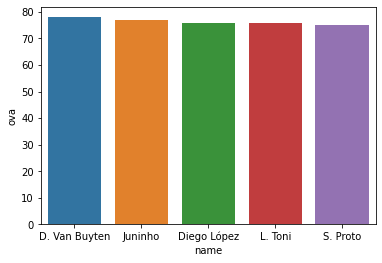

In [36]:
sns.barplot(x='name', y ="ova", data = players_w_pay_range)
plt.show()

# POTENCIAL BEST PLAYERS CONSIDERING BUDGET

In [37]:
df = file1_values[file1_values['valuet'].between(625.0, 800.0)]
players_w_pay_range_pot = df.sort_values(by=['pot'],ascending=False).head(5)
players_w_pay_range_pot

,name,age,ova,position,pot,valuet
16334,L. Netz,17,63,LB LM,86,750.0
16737,O. Rekik,18,63,CB,85,775.0
16542,L. Pirola,18,63,CB,84,775.0
13727,K. Dembélé,17,63,RM,84,800.0
13758,K. Hoever,18,63,RB CB,84,775.0


In [38]:
## RANKED BY VALUE

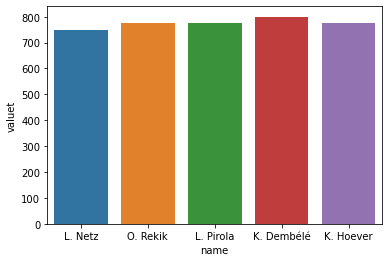

In [39]:
sns.barplot(x='name', y ="valuet", data = players_w_pay_range_pot)
plt.show()

In [40]:
## RANKED BY POTENTIAL WHITIN ALLOWED VALUE

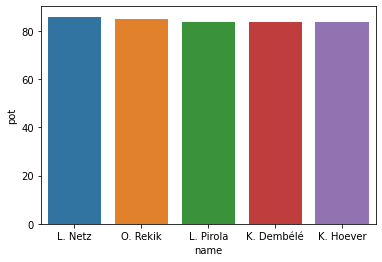

In [41]:
sns.barplot(x='name', y ="pot", data = players_w_pay_range_pot)
plt.show()

In [42]:
for col in file1.columns:
    print(col)

id
name
age
ova
nationality
club
bov
bp
position
player_photo
club_logo
flag_photo
pot
team_&_contract
height
weight
foot
growth
joined
loan_date_end
value_M
wage_K
release_clause_M
contract
attacking
crossing
finishing
heading_accuracy
short_passing
volleys
skill
dribbling
curve
fk_accuracy
long_passing
ball_control
movement
acceleration
sprint_speed
agility
reactions
balance
power
shot_power
jumping
stamina
strength
long_shots
mentality
aggression
interceptions
positioning
vision
penalties
composure
defending
marking
standing_tackle
sliding_tackle
goalkeeping
gk_diving
gk_handling
gk_kicking
gk_positioning
gk_reflexes
total_stats
base_stats
w/f
sm
a/w
d/w
ir
pac
sho
pas
dri
def
phy
hits
ls
st
rs
lw
lf
cf
rf
rw
lam
cam
ram
lm
lcm
cm
rcm
rm
lwb
ldm
cdm
rdm
rwb
lb
lcb
cb
rcb
rb
gk
gender
joined_year
value_multiplier
wage_multiplier
release_clause_multiplier


In [43]:
file1 = file1.drop(['value_multiplier', 'wage_multiplier', 'release_clause_multiplier'], axis=1)

# MACHINE LEARNING FOR OVA


### Data cleaning


In [44]:
file1 = file1.drop(['id',  'name', 'position', 'player_photo', 'club_logo', 'flag_photo', 'team_&_contract', 'joined', 'loan_date_end', 'contract',
                  'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 
                  'lcb', 'cb', 'rcb', 'rb', 'gk', 'gender','club', 'nationality','joined_year'], axis=1)

In [45]:
#Showing normal distribution to see if normalization will be needed)

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


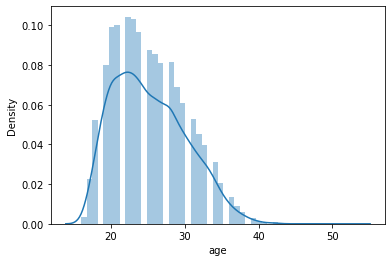

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


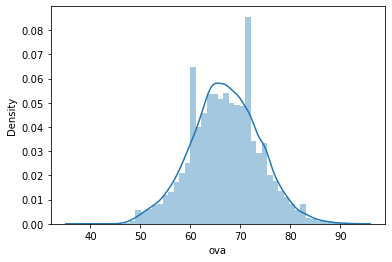

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


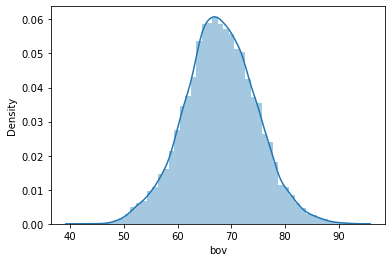

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


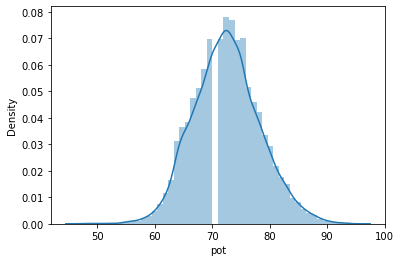

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


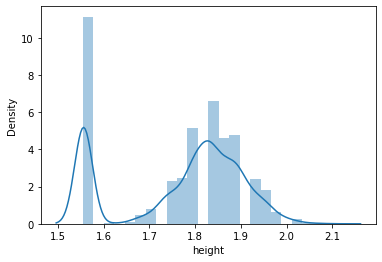

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


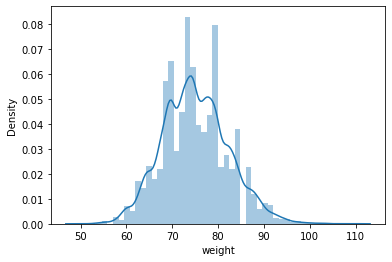

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


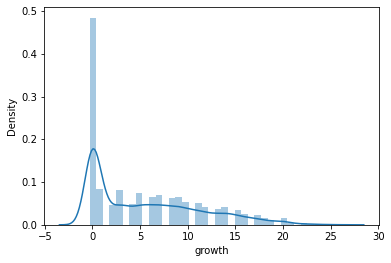

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


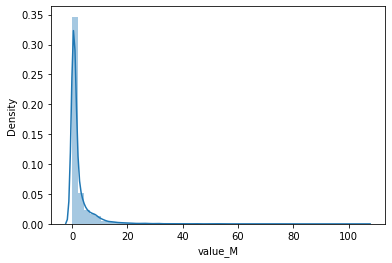

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


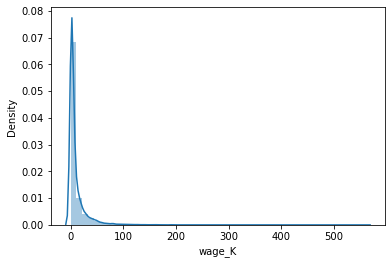

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


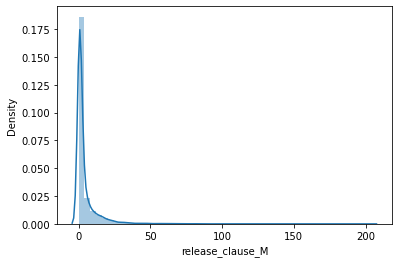

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


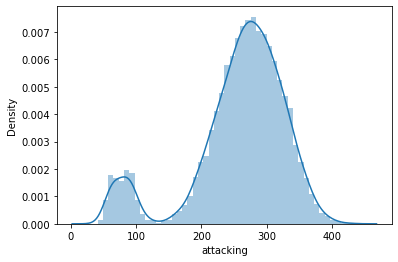

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


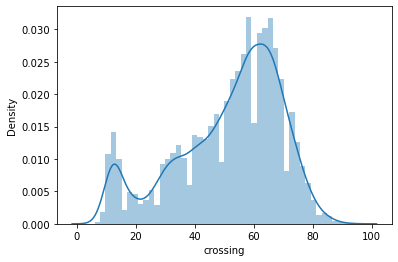

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


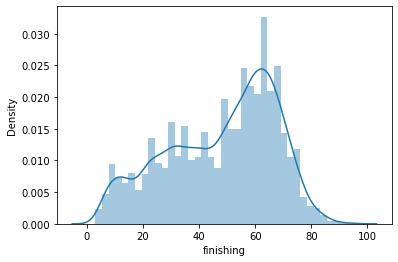

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


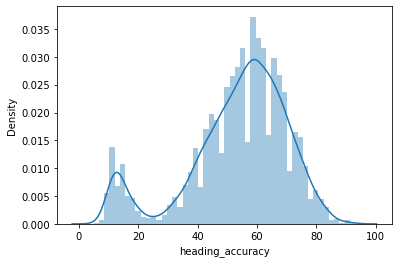

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


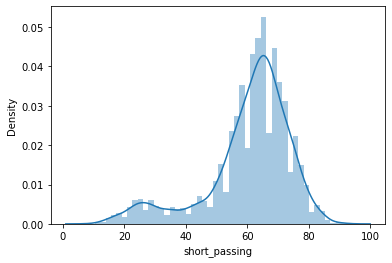

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


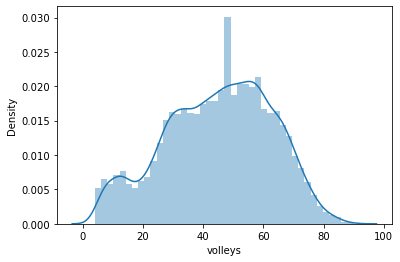

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


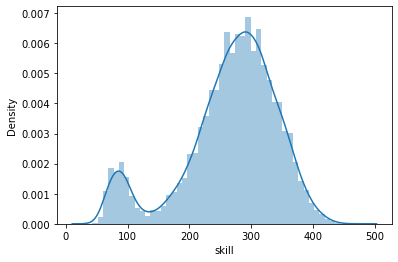

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


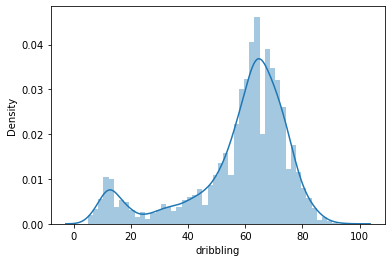

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


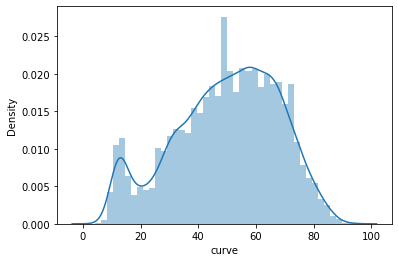

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


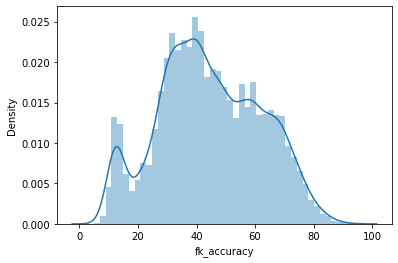

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


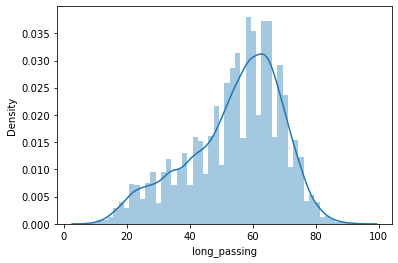

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


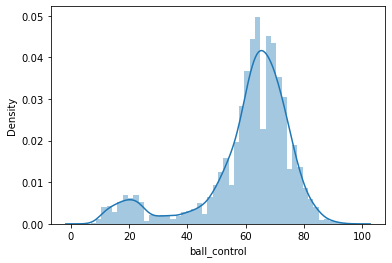

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


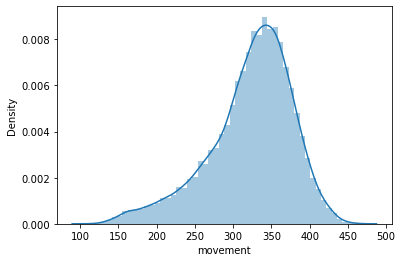

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


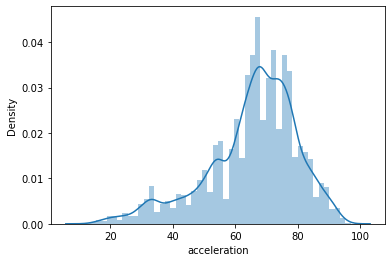

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


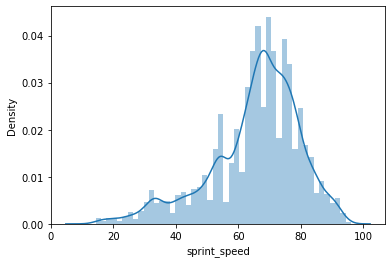

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


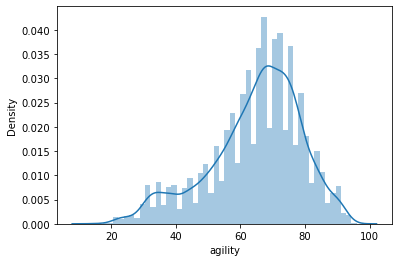

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


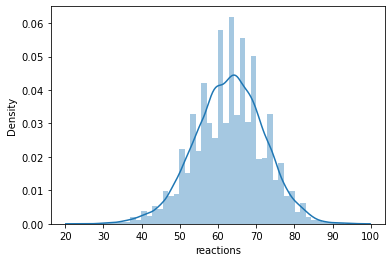

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


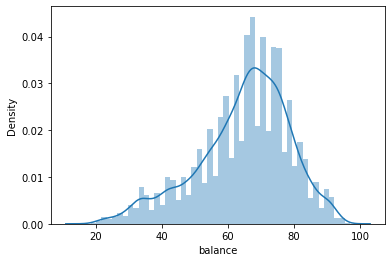

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


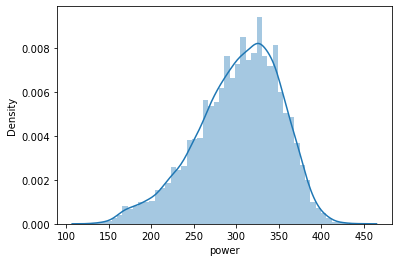

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


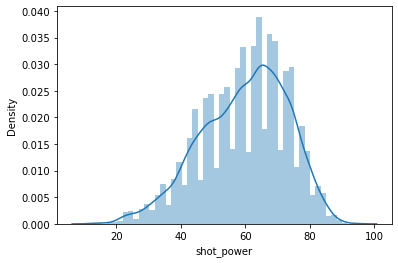

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


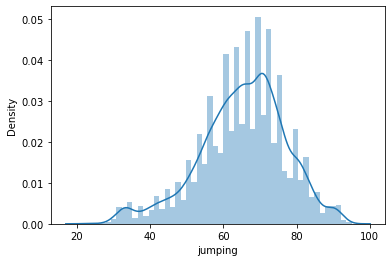

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


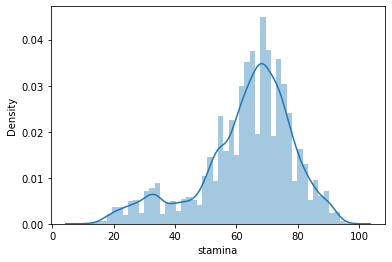

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


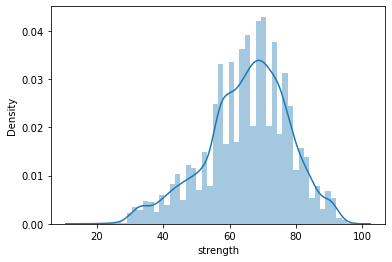

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


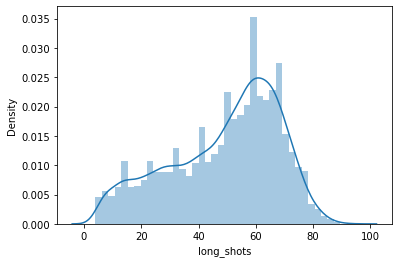

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


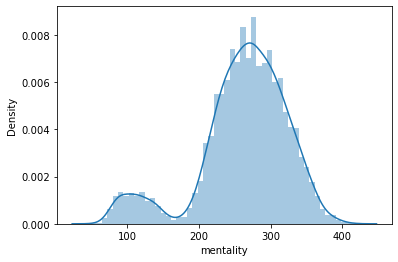

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


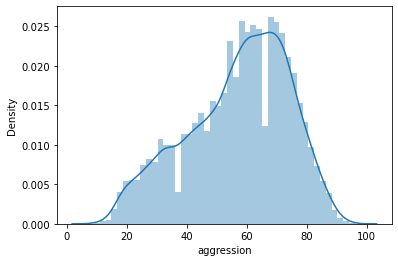

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


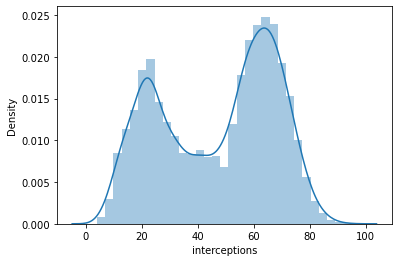

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


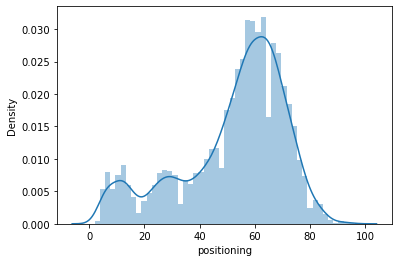

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


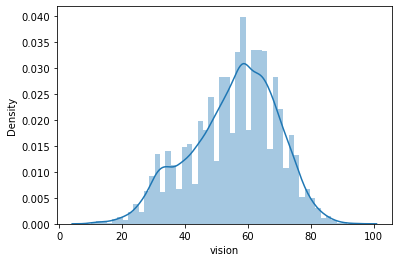

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


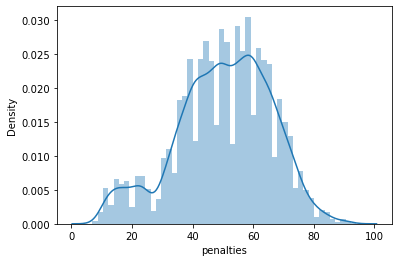

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


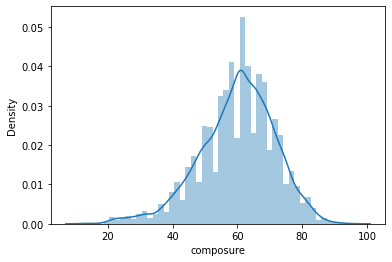

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


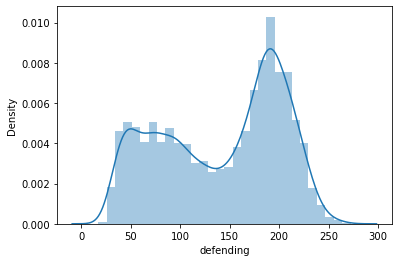

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


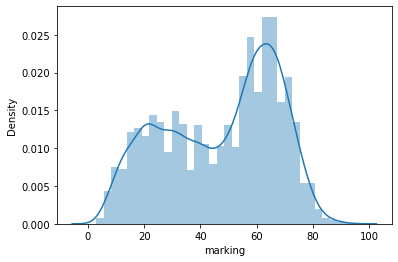

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


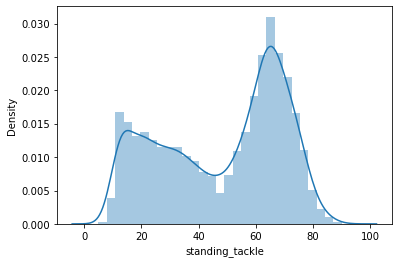

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


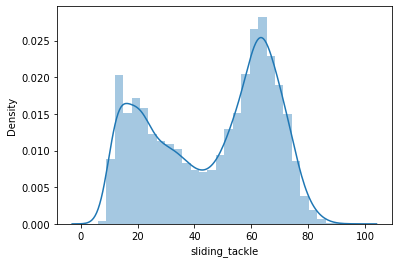

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


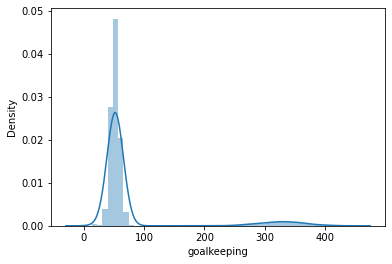

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


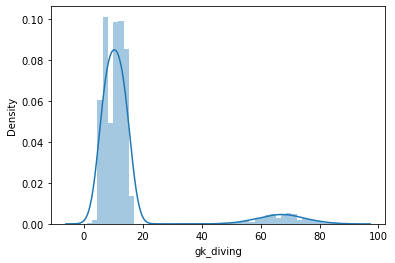

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


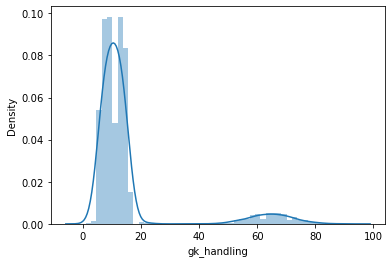

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


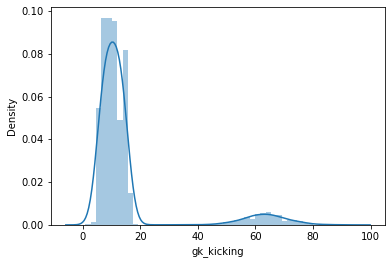

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


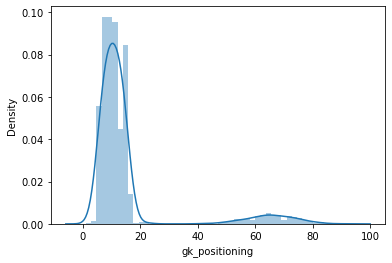

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


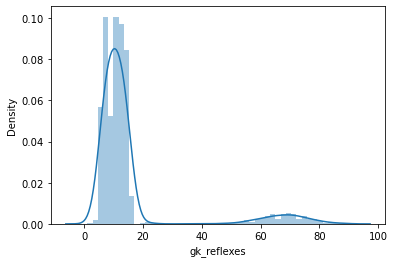

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


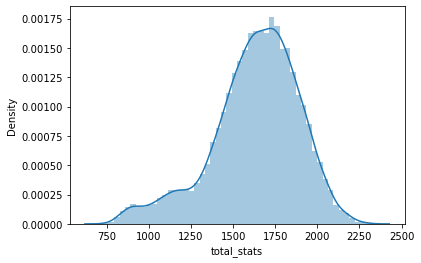

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


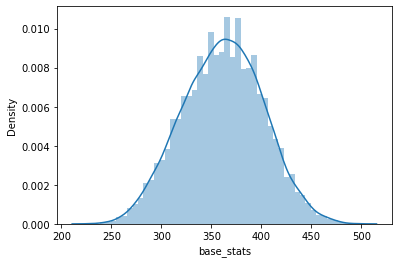

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


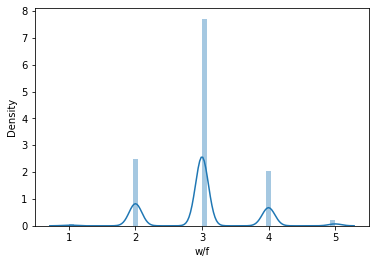

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


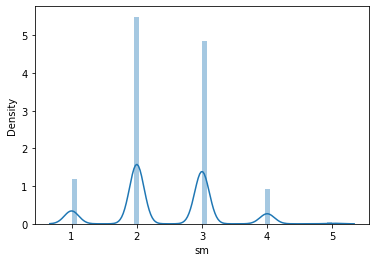

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


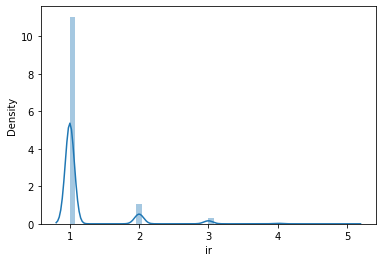

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


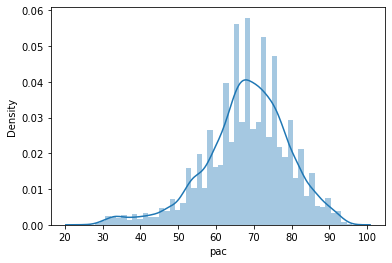

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


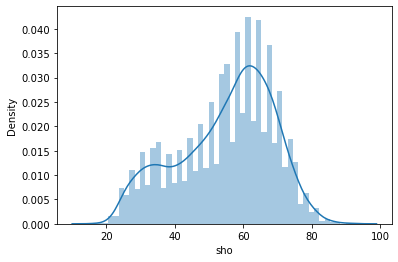

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


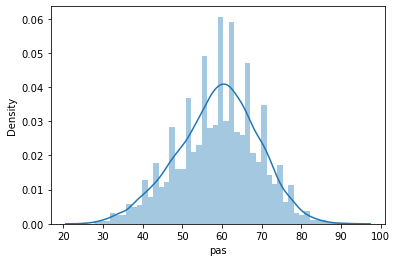

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


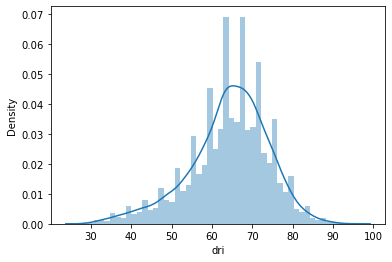

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


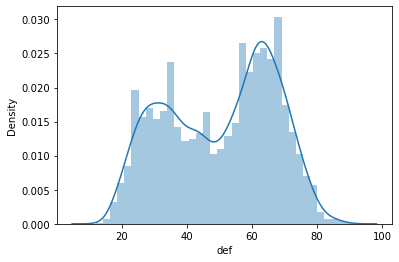

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


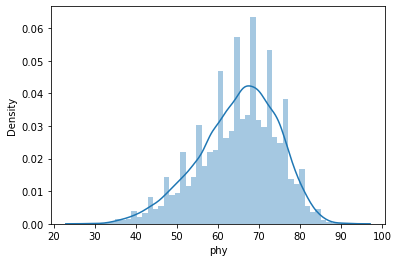

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


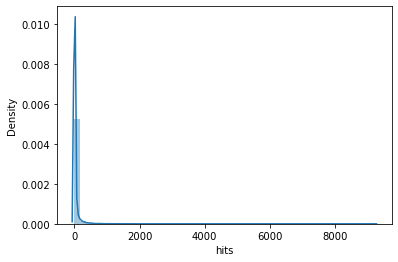

In [46]:
for column in file1.select_dtypes(np.number).columns:
    sns.distplot(file1[column])
    plt.show()

In [47]:
#normalization will be needed as some variables are very disperse

In [48]:
#checking correlation matrix to see if any columns can be dropped

In [49]:
correlations_matrix = file1.corr()  
correlations_matrix

,age,ova,bov,pot,height,weight,growth,value_M,wage_K,release_clause_M,...,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits
age,1.000000,0.517099,0.456734,-0.237619,0.061240,0.258682,-0.850204,0.095981,0.200851,0.075386,...,0.081895,0.070940,0.403141,-0.177291,0.309438,0.396082,0.241027,0.223184,0.436462,-0.079690
ova,0.517099,1.000000,0.985877,0.592268,0.027395,0.151834,-0.595585,0.631679,0.592925,0.597617,...,0.201386,0.345421,0.474492,0.201319,0.487060,0.699229,0.643427,0.344906,0.543354,0.239555
bov,0.456734,0.985877,1.000000,0.628323,0.020598,0.132560,-0.542890,0.640818,0.592453,0.608384,...,0.212576,0.373599,0.455974,0.212889,0.478573,0.689975,0.640746,0.349906,0.535579,0.255477
pot,-0.237619,0.592268,0.628323,1.000000,0.003989,-0.039809,0.294499,0.563570,0.462235,0.549201,...,0.137861,0.241020,0.293444,0.259294,0.244481,0.395773,0.445004,0.170562,0.159959,0.347990
height,0.061240,0.027395,0.020598,0.003989,1.000000,0.464253,-0.028515,0.007990,0.016338,0.008431,...,-0.117819,-0.303536,0.033130,-0.257268,-0.064007,-0.148175,-0.208145,0.041718,0.247421,-0.001919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pas,0.396082,0.699229,0.689975,0.395773,-0.148175,-0.099561,-0.434753,0.444484,0.419563,0.418093,...,0.232780,0.367759,0.364651,0.248176,0.658508,1.000000,0.823216,0.142314,0.172751,0.162474
dri,0.241027,0.643427,0.640746,0.445004,-0.208145,-0.207594,-0.319487,0.442156,0.389842,0.416343,...,0.261367,0.459217,0.289093,0.521642,0.765627,0.823216,1.000000,-0.153362,0.024540,0.193827
def,0.223184,0.344906,0.349906,0.170562,0.041718,0.104569,-0.239034,0.172856,0.191576,0.167362,...,-0.066176,-0.047676,0.145041,-0.253257,-0.416957,0.142314,-0.153362,1.000000,0.513218,0.040482
phy,0.436462,0.543354,0.535579,0.159959,0.247421,0.536846,-0.484974,0.266541,0.260983,0.250809,...,-0.009766,-0.088749,0.194346,-0.126338,0.051973,0.172751,0.024540,0.513218,1.000000,0.069655


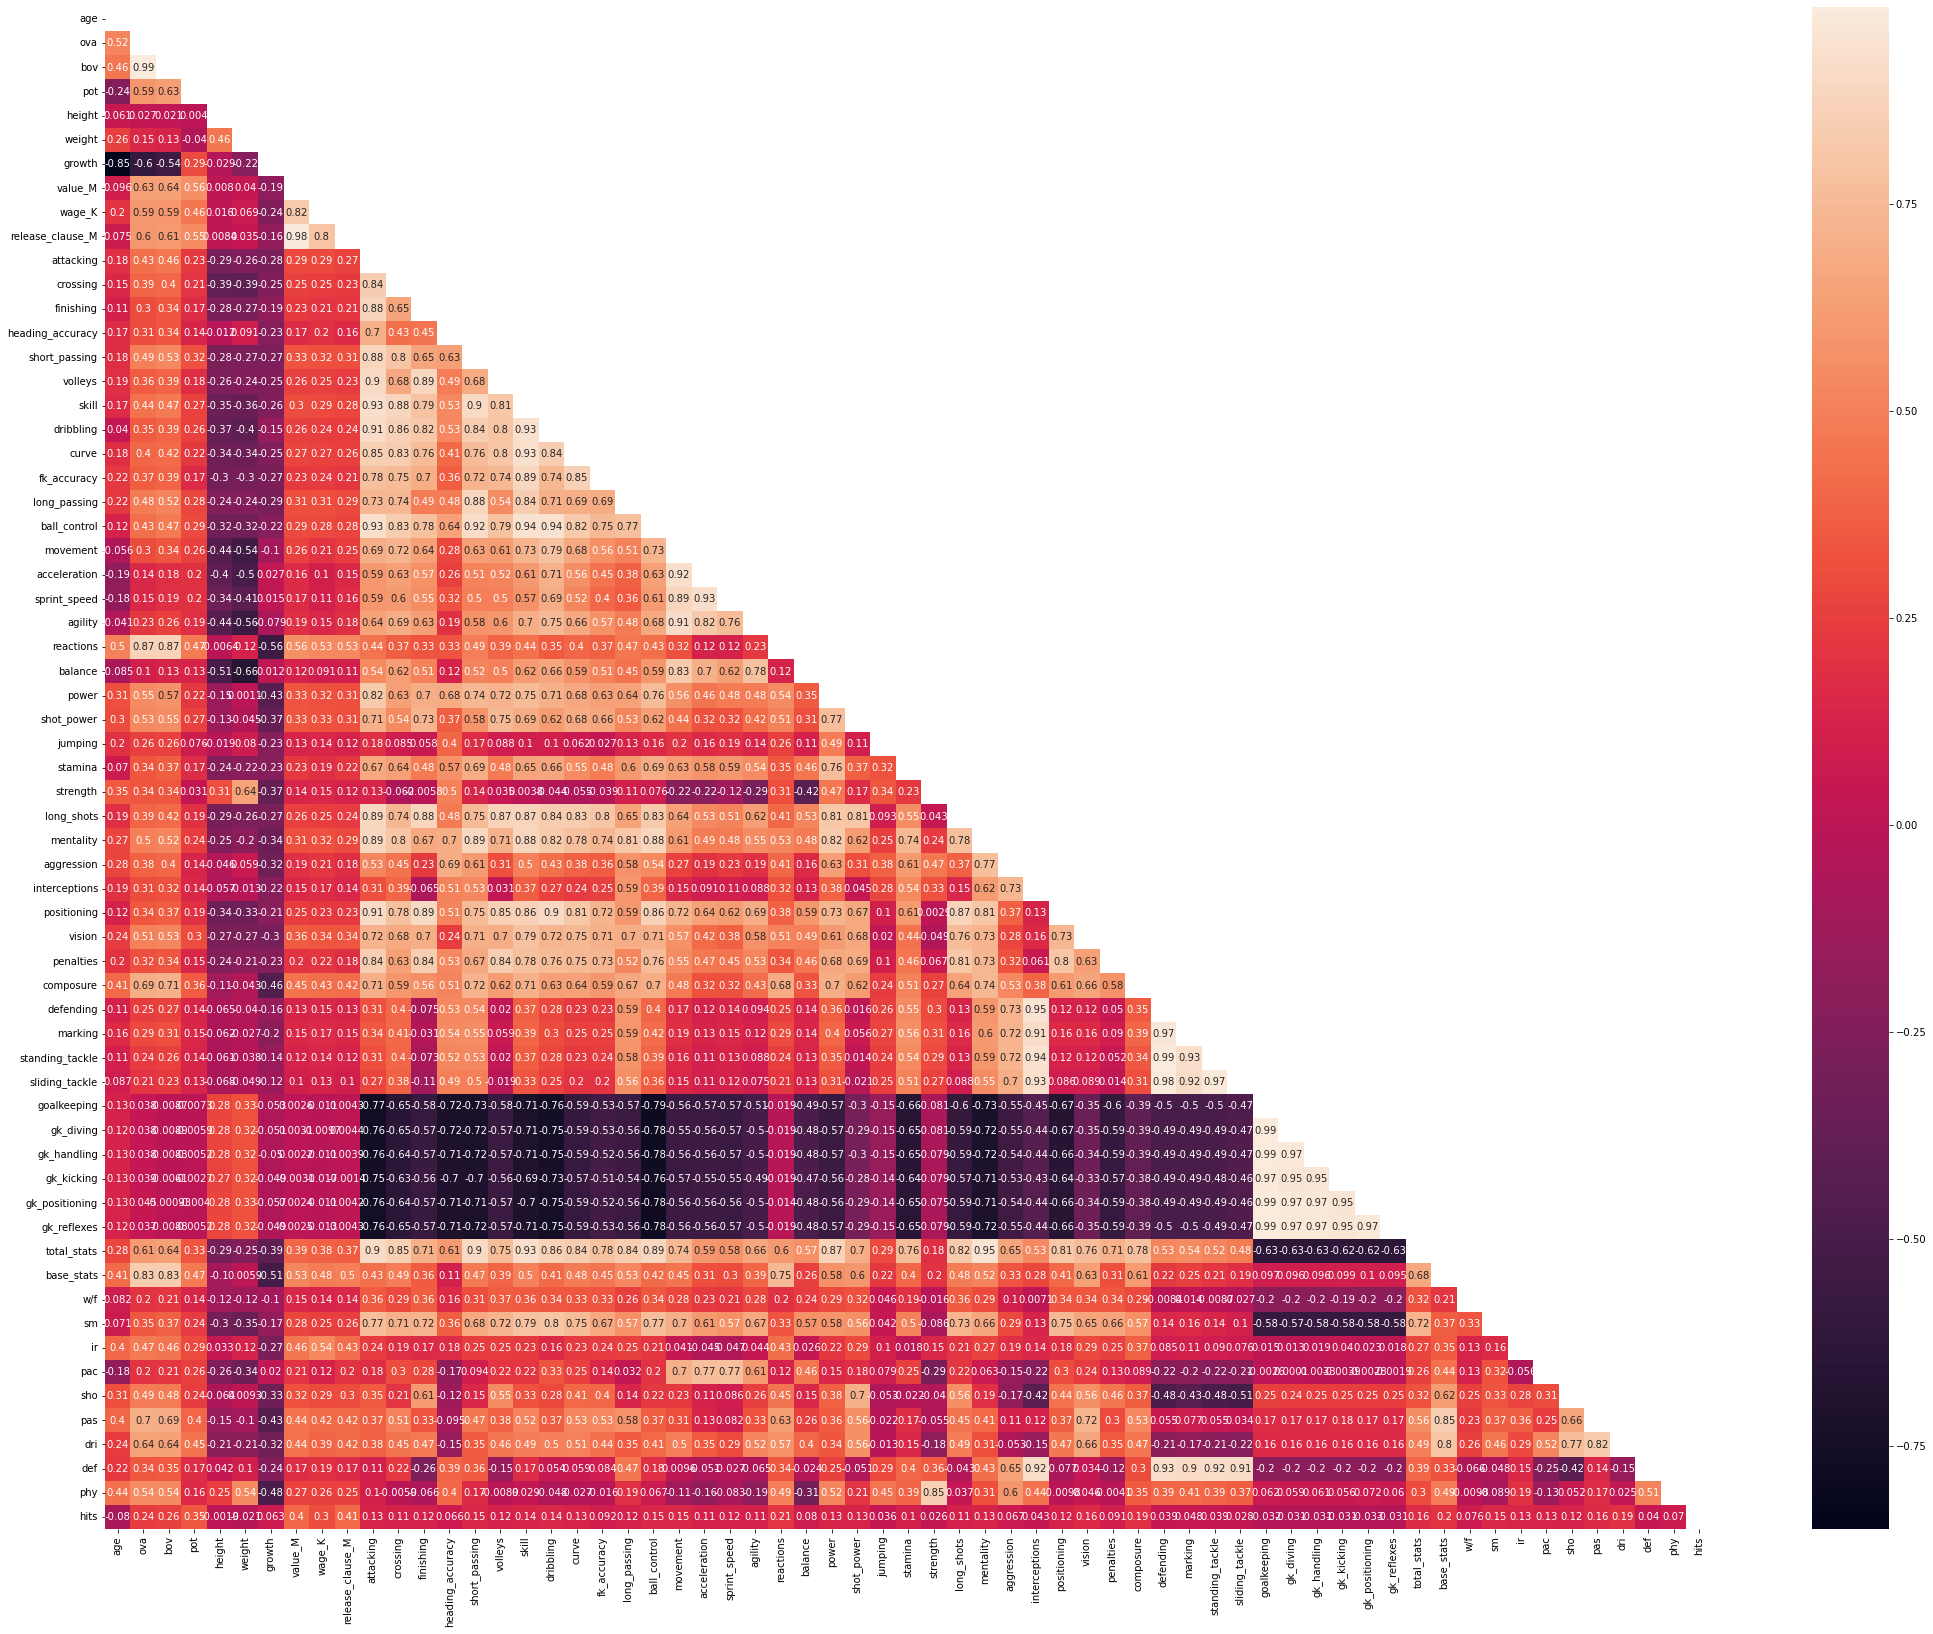

In [50]:
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(36, 28))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [51]:
### dropping BOV AS IT IS TOO CORRELATED WITH OVA AND THEY MEAN THE SAME

In [52]:
##MOST GOALKEEPING VALUES ARE NOT THAT CORRELATED TO THE MOST OF THE VARIABLES, WILL DROP EVERYTHING BUT GOALKEEPING

In [53]:
proof =file1[['ova', 'bov']]
proof.head()

,ova,bov
0,69,71
1,71,70
2,71,71
3,68,70
4,81,82


In [54]:
file1 = file1.drop(columns=['gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes','bov'], axis=1)


### Normalizing trough boxcox

In [55]:
def boxcox_transform(file1):
    numeric_cols = file1.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        file1[column] = np.where(file1[column]<=0, np.NAN, file1[column]) 
        file1[column] = file1[column].fillna(file1[column].mean())
        transformed_data, ci = stats.boxcox(file1[column])
        file1[column] = transformed_data
        _ci[column] = [ci] 
    return file1, _ci

data, _ci = boxcox_transform(file1)

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


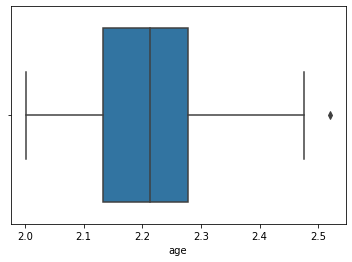

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


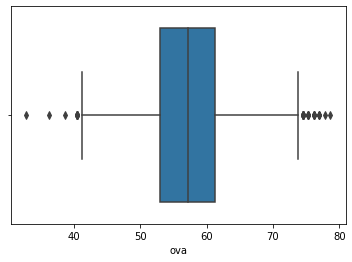

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


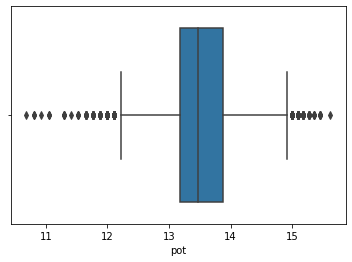

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


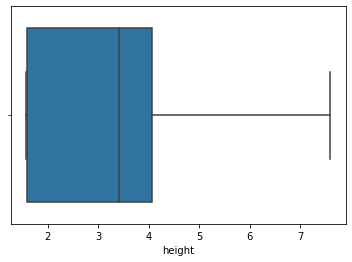

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


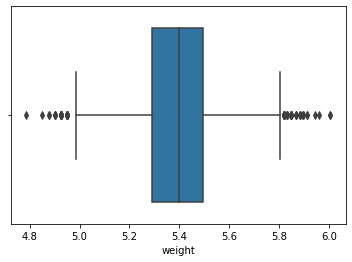

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


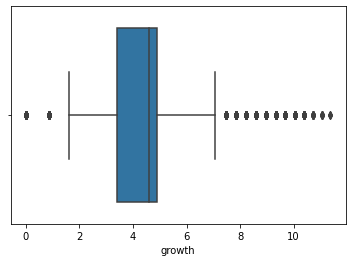

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


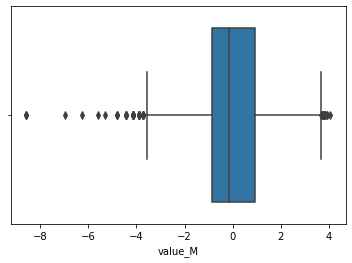

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


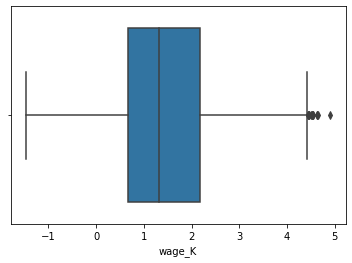

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


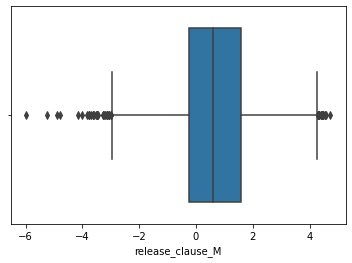

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


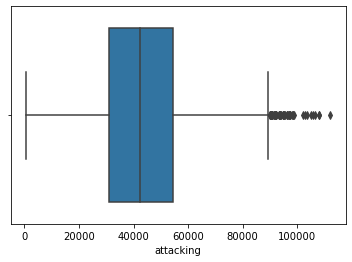

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


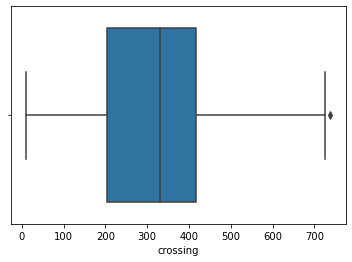

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


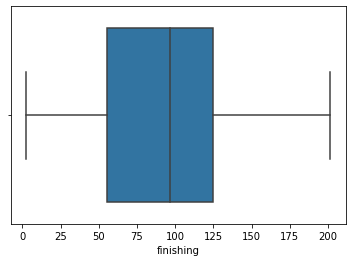

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


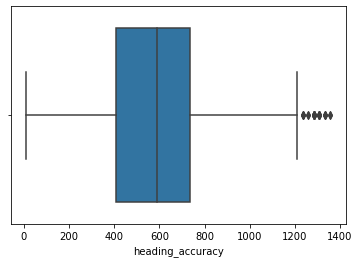

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


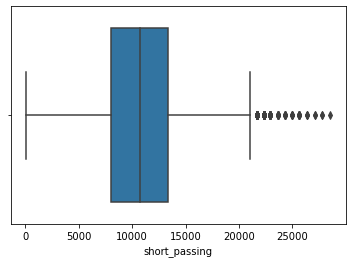

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


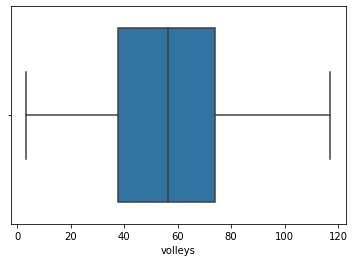

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


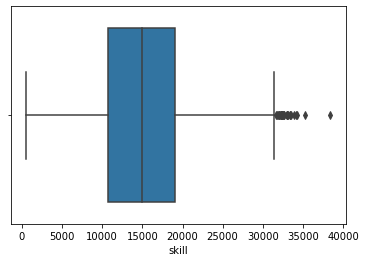

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


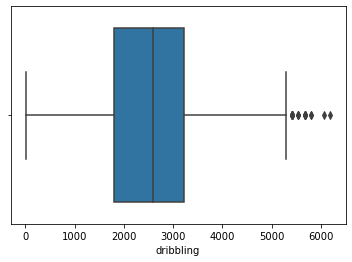

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


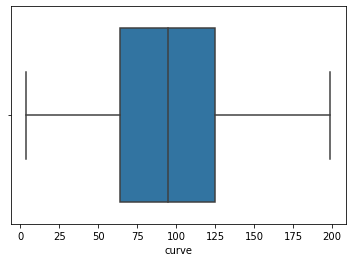

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


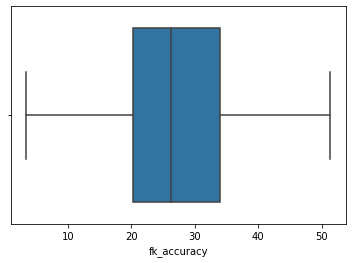

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


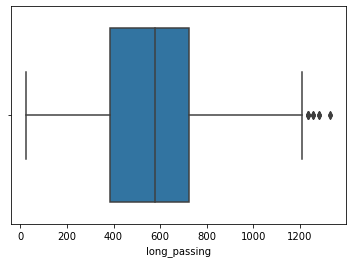

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


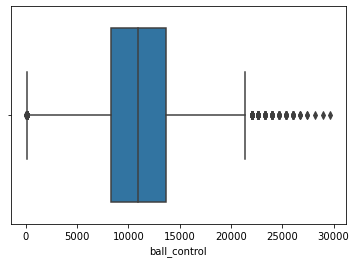

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


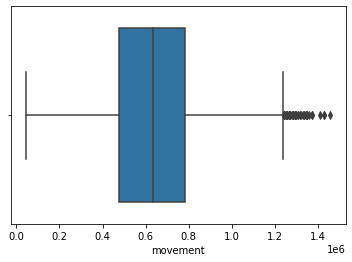

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


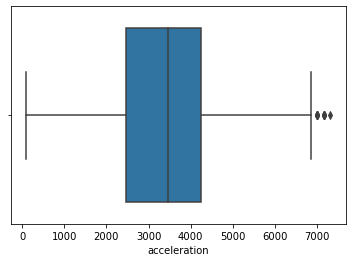

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


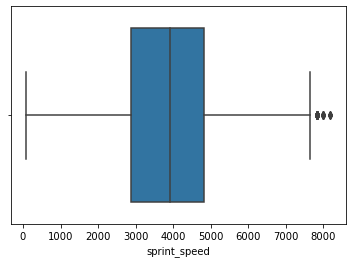

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


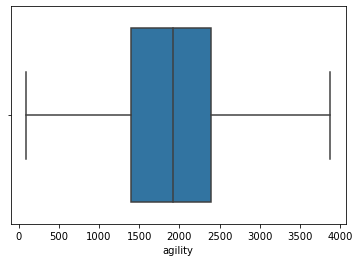

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


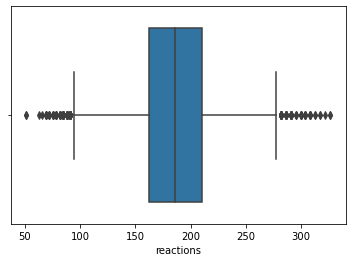

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


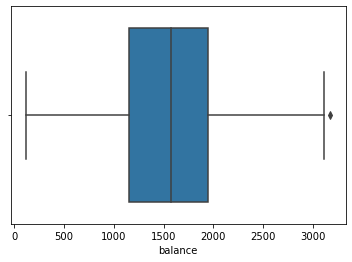

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


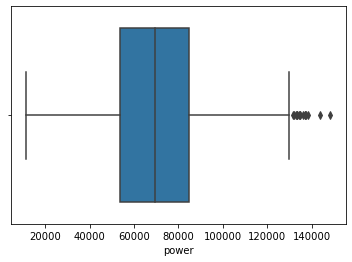

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


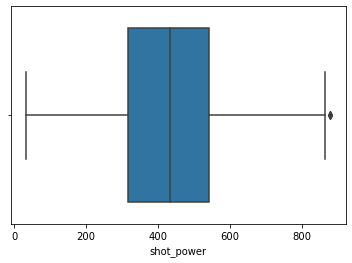

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


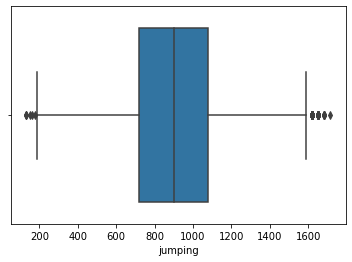

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


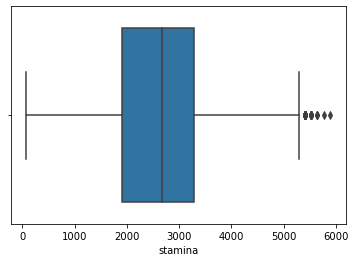

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


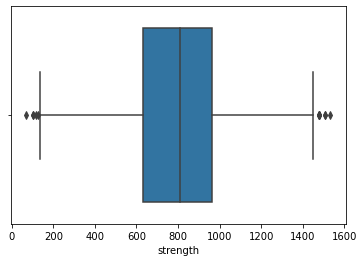

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


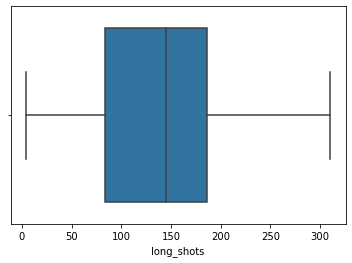

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


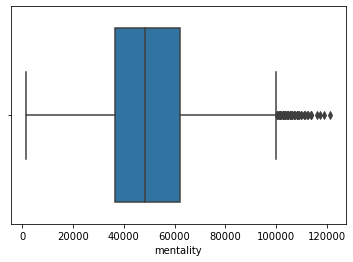

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


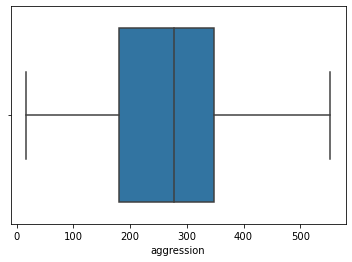

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


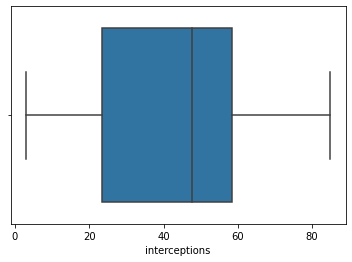

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


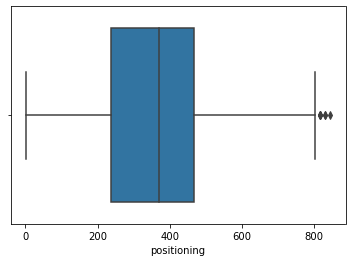

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


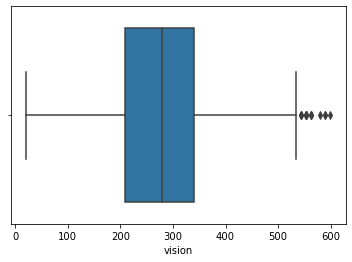

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


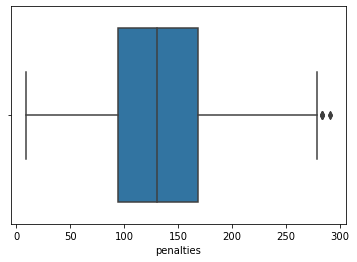

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


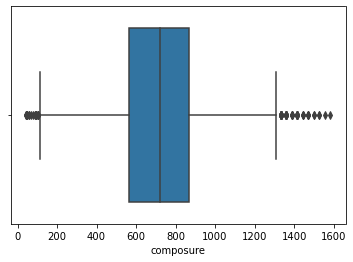

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


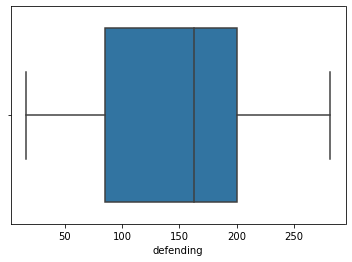

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


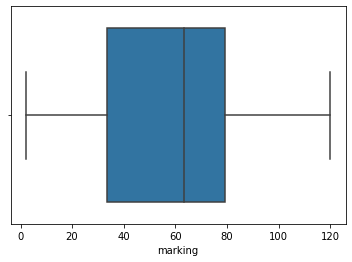

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


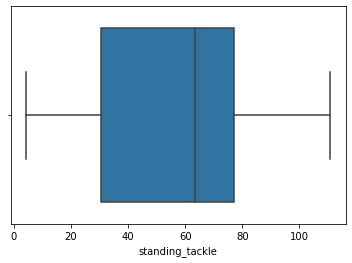

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


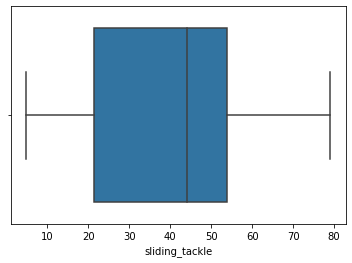

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


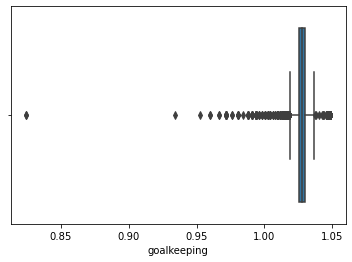

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


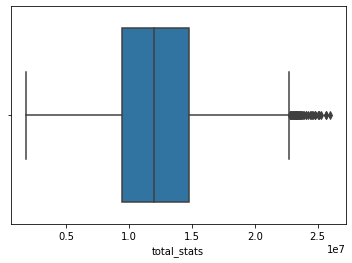

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


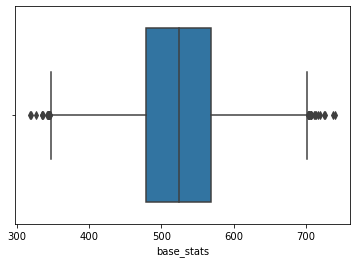

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


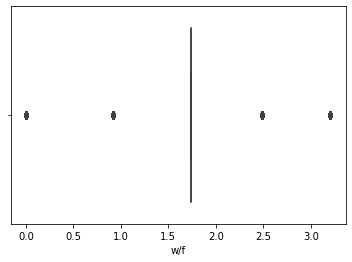

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


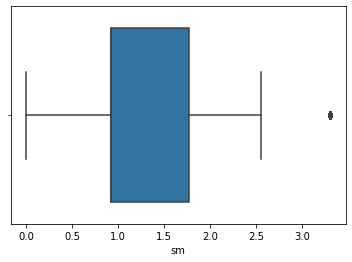

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


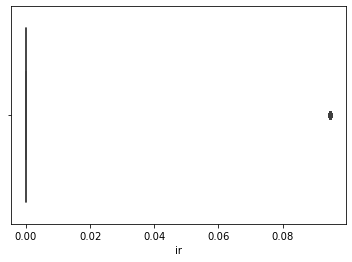

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


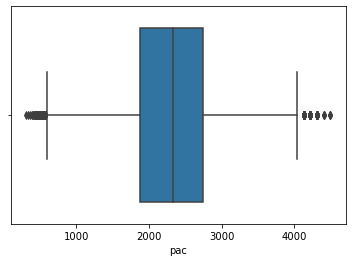

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


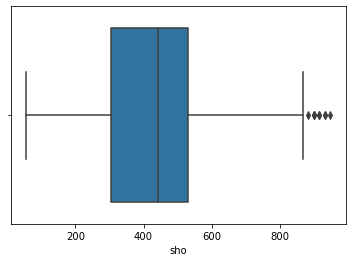

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


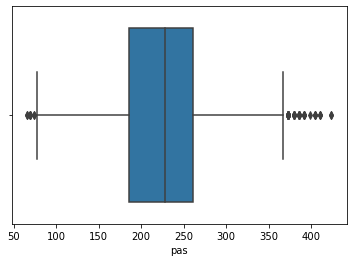

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


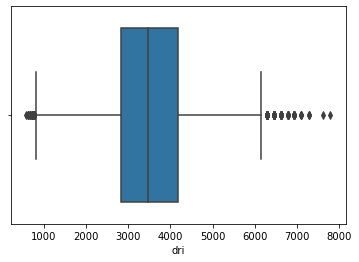

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


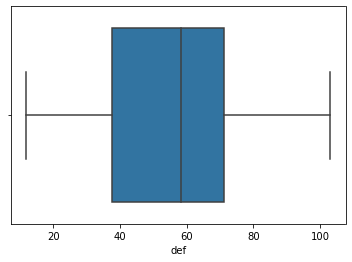

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


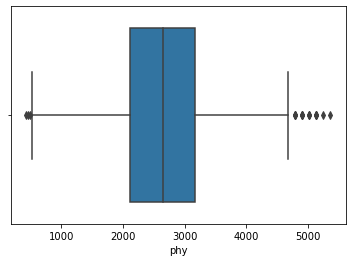

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


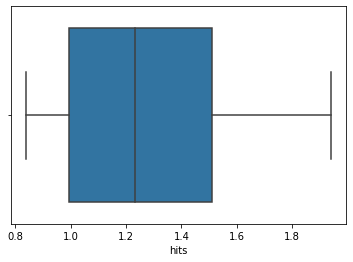

In [56]:
for col in file1.select_dtypes(np.number).columns:
    sns.boxplot(file1[col])
    plt.show()

In [57]:
## Dealing with outliers

In [58]:
def outliers_del(file1, threshold=2.5, in_columns=file1.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(file1[column],75)
            lower = np.percentile(file1[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data.loc[data[column] > upper_limit, column] = upper_limit
            data.loc[data[column] < lower_limit, column] = lower_limit
    return file1


### Creating Normalized framework for machine learning

In [59]:
file1_ml = file1.copy()
file1_ml = outliers_del(file1_ml, threshold=1.5, skip_columns=[])

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


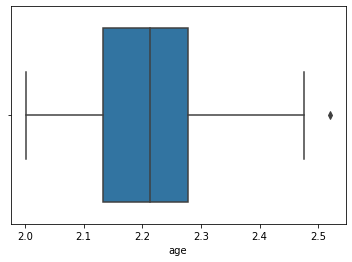

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


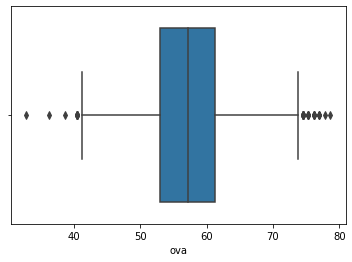

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


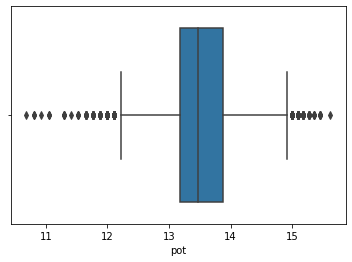

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


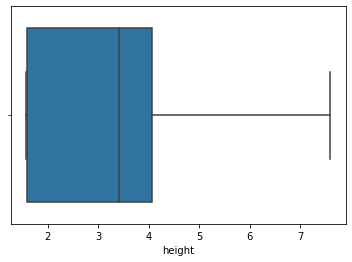

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


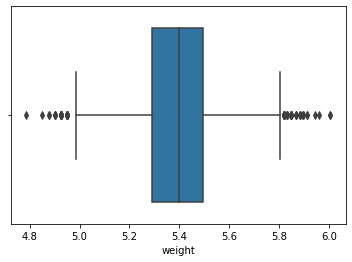

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


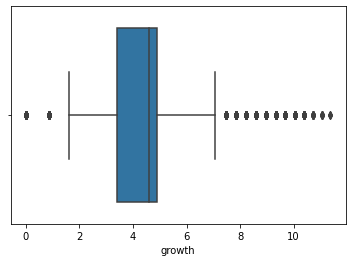

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


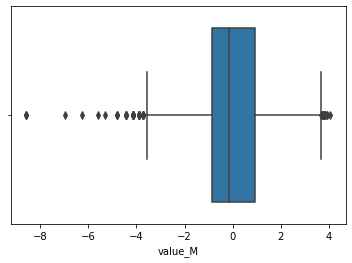

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


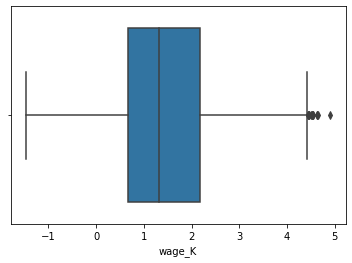

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


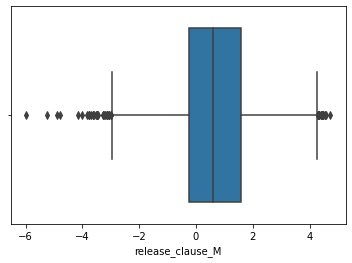

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


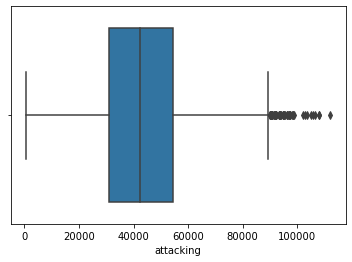

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


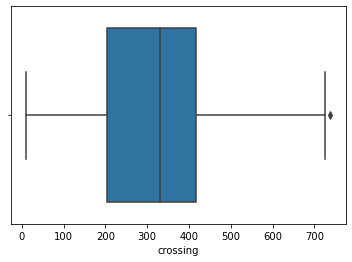

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


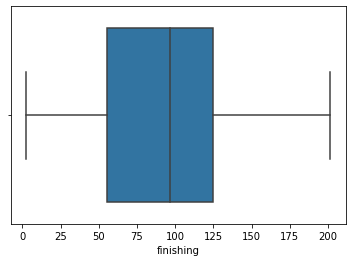

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


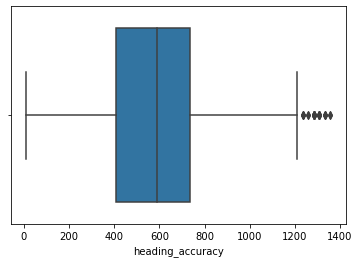

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


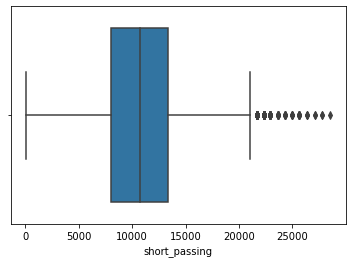

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


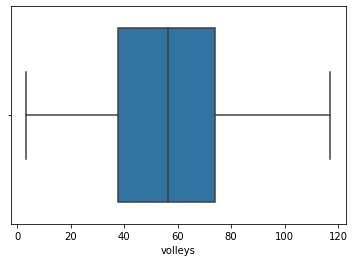

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


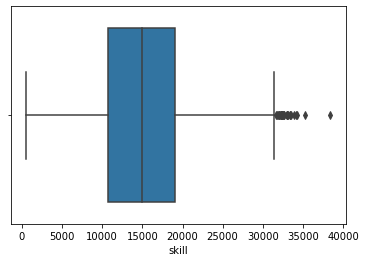

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


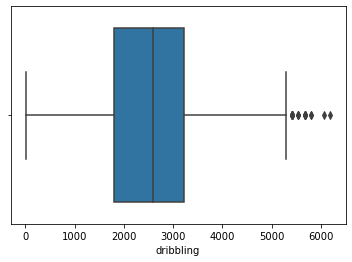

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


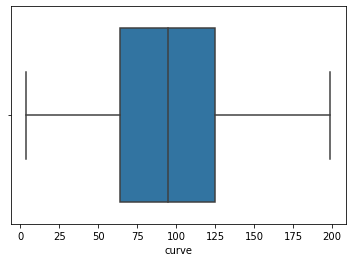

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


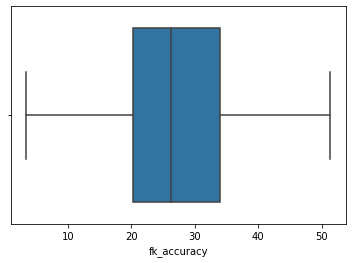

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


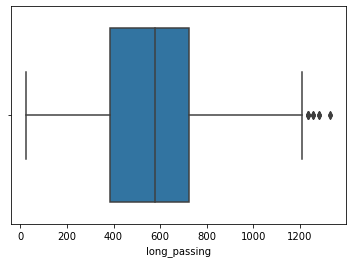

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


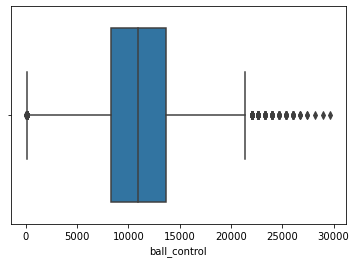

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


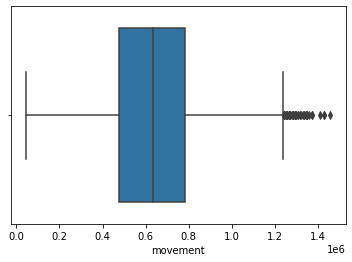

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


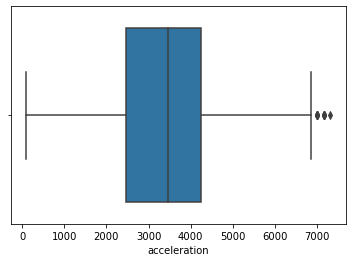

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


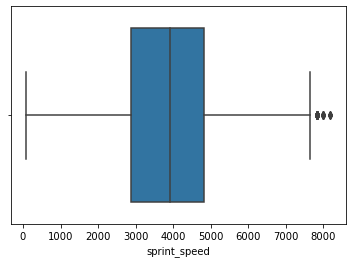

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


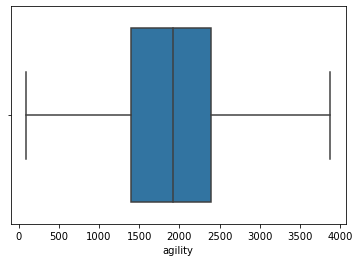

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


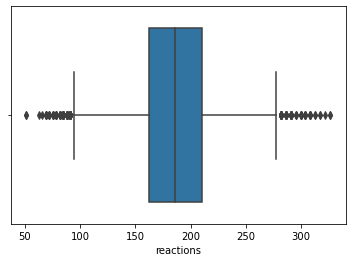

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


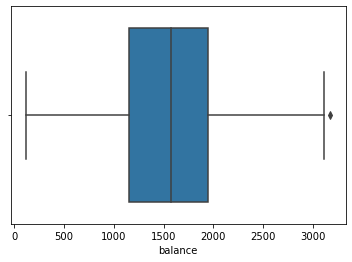

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


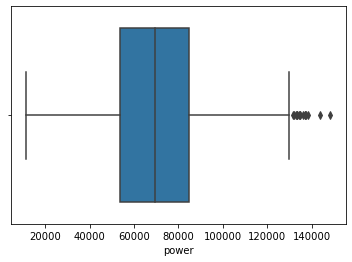

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


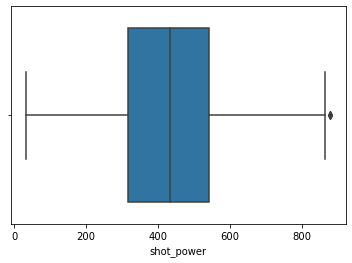

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


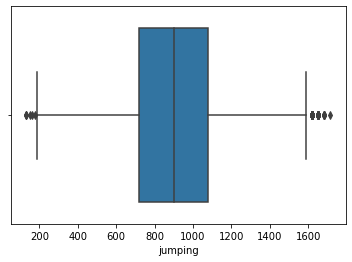

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


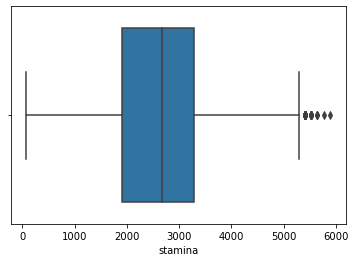

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


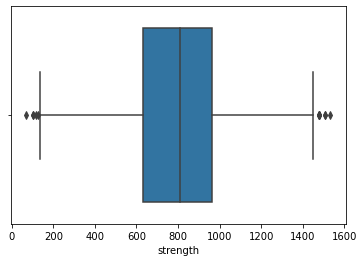

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


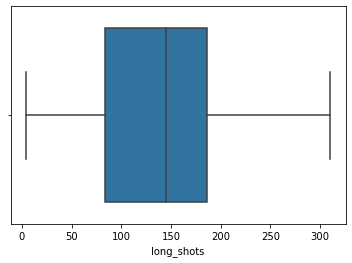

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


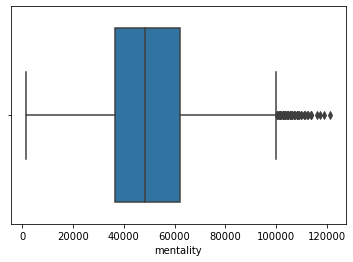

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


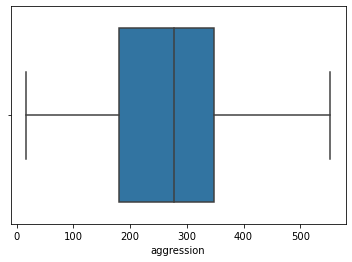

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


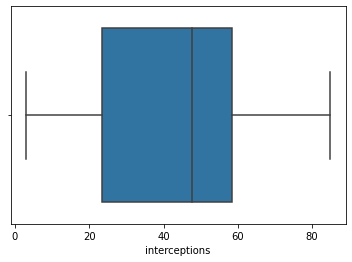

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


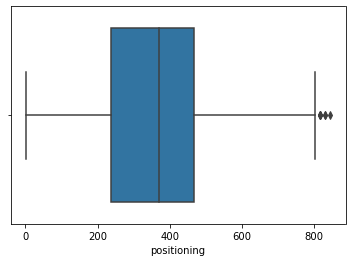

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


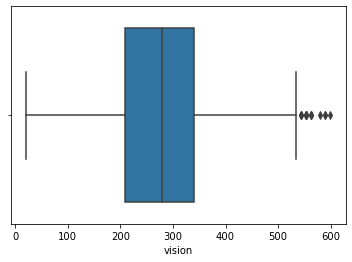

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


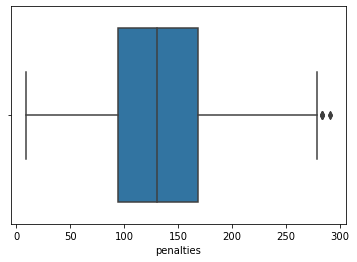

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


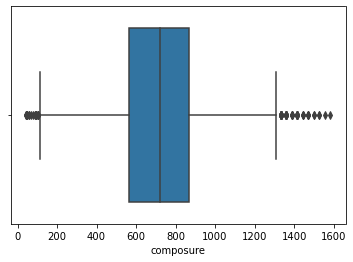

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


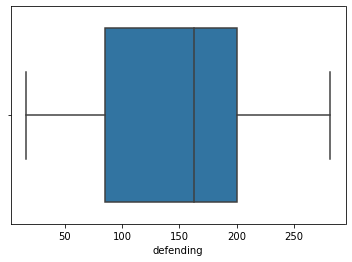

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


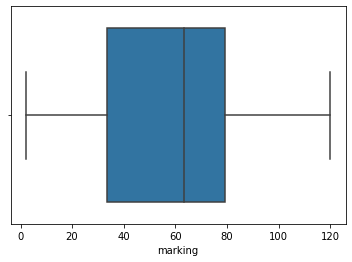

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


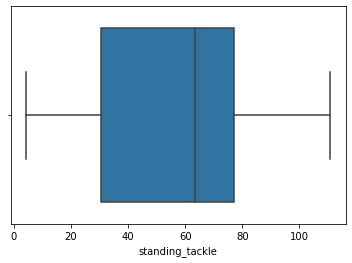

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


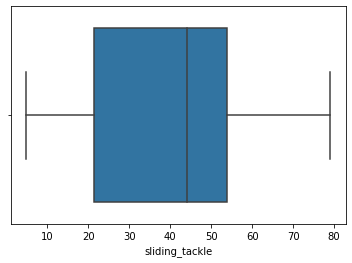

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


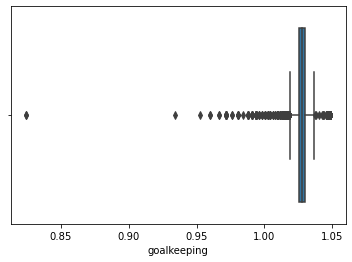

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


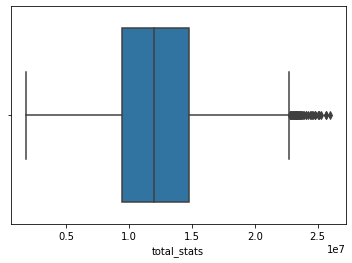

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


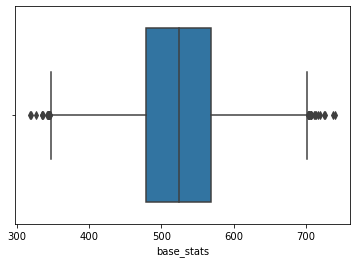

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


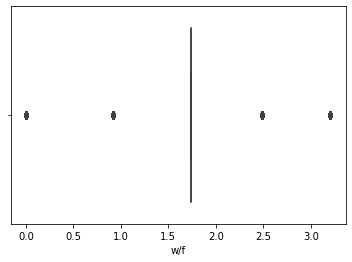

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


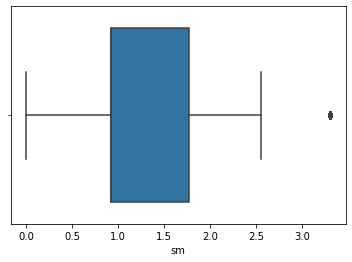

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


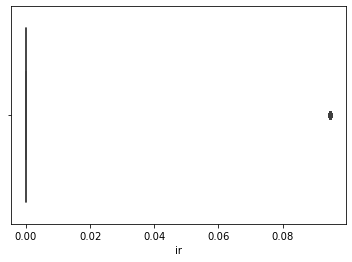

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


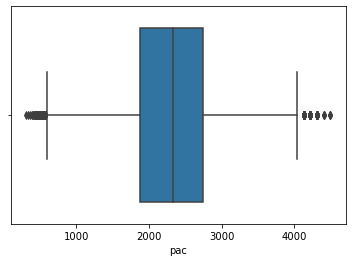

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


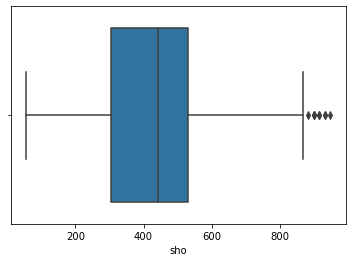

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


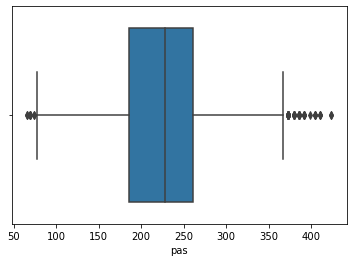

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


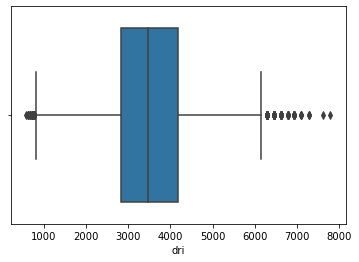

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


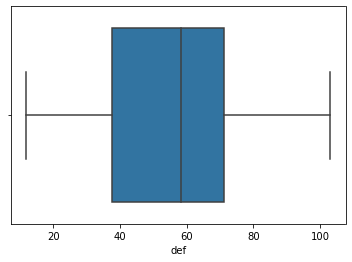

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


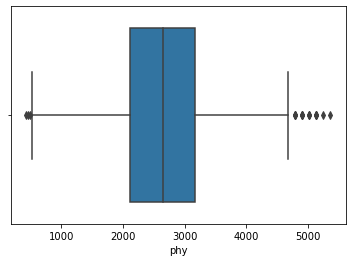

/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


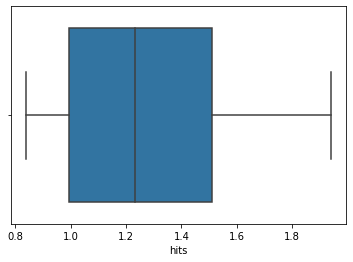

In [60]:
for col in file1_ml.select_dtypes(np.number).columns:
    sns.boxplot(file1_ml[col])
    plt.show()

### separating categorical with numerical values

In [61]:
cat = file1_ml.select_dtypes('object')
num = file1_ml.select_dtypes(np.number)

num = num.drop(columns=['ova'])

### Transformation for  numerical categories


In [62]:
transformer = StandardScaler().fit(num)
num_norm= transformer.transform(num)
print(num.shape)

(17125, 56)


In [64]:

num_normalized = pd.DataFrame(num_norm)
num_normalized

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,1.450536,-0.591344,0.351150,0.975964,0.095655,-0.326719,0.433197,0.703976,0.805517,1.473102,...,0.046495,-0.553784,2.758048,0.192738,0.225765,1.103064,0.672847,1.054609,0.370169,-0.821254
1,1.994135,-0.238206,-1.442426,-1.488533,0.095655,-0.358137,0.433197,-0.440985,1.294453,0.965722,...,1.477747,0.713221,-0.362503,-1.339327,1.048246,1.425297,0.439111,0.454618,-0.281405,-0.821254
2,1.450536,-0.238206,0.092896,-0.255888,0.095655,0.100409,0.952329,0.703976,1.294453,1.851968,...,1.477747,1.900398,2.758048,-1.878240,0.962445,1.753021,1.419696,-0.850380,-1.314536,0.405929
3,1.865362,1.614852,-1.428216,0.001096,1.277438,0.732880,0.732621,0.703976,-0.077623,0.036296,...,0.046495,-1.954729,-0.362503,-0.712996,0.793180,0.682199,0.439111,-0.200804,-0.583830,-1.302626
4,1.865362,1.452141,-0.374859,-0.993423,0.095655,1.238771,0.803763,0.949485,1.957914,1.473102,...,1.477747,1.900398,2.760136,-0.958110,1.134819,2.767889,2.523003,0.754161,-0.681188,1.740826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,-0.605723,-0.591344,2.295583,0.001096,-0.726441,-0.425365,-0.495815,0.703976,-1.036296,-1.022675,...,-1.498099,-0.553784,-0.362503,-1.265815,-1.671435,-2.030901,-1.564787,0.814181,0.370169,-0.493655
17121,-1.702905,-1.131522,-1.442426,0.314558,0.469467,-1.593405,-0.184360,-1.551273,-0.332627,-0.207041,...,0.046495,-0.553784,-0.362503,-0.628562,-0.719770,-0.226269,-0.897297,-0.437763,-1.053403,-0.493655
17122,-1.702905,-0.950024,0.092896,-0.719762,0.680564,-1.593405,-0.495815,-1.551273,-0.766637,0.098727,...,0.046495,-0.553784,-0.362503,-0.542763,-1.401054,-1.435848,-1.245596,0.215685,-1.053403,-1.302626
17123,-1.119998,0.109628,0.092896,-1.132725,0.680564,-0.539446,-0.184360,-0.704408,-0.698292,0.553041,...,1.477747,-0.553784,-0.362503,0.192738,-1.457178,-0.128060,-0.616794,0.514451,-1.142162,-0.493655


In [65]:
num.columns

Index(['age', 'pot', 'height', 'weight', 'growth', 'value_M', 'wage_K',
       'release_clause_M', 'attacking', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling',
       'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing_tackle',
       'sliding_tackle', 'goalkeeping', 'total_stats', 'base_stats', 'w/f',
       'sm', 'ir', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits'],
      dtype='object')

In [66]:
cols = ['age', 'pot', 'height', 'weight', 'growth', 'value_M', 'wage_K',
       'release_clause_M', 'attacking', 'crossing', 'finishing',
       'heading_accuracy', 'short_passing', 'volleys', 'skill', 'dribbling',
       'curve', 'fk_accuracy', 'long_passing', 'ball_control', 'movement',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'power', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'mentality', 'aggression', 'interceptions', 'positioning', 'vision',
       'penalties', 'composure', 'defending', 'marking', 'standing_tackle',
       'sliding_tackle', 'goalkeeping', 'total_stats', 'base_stats', 'w/f',
       'sm', 'ir', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'hits']

num_normalized.columns = cols
num_normalized.head()

,age,pot,height,weight,growth,value_M,wage_K,release_clause_M,attacking,crossing,...,w/f,sm,ir,pac,sho,pas,dri,def,phy,hits
0,1.450536,-0.591344,0.351150,0.975964,0.095655,-0.326719,0.433197,0.703976,0.805517,1.473102,...,0.046495,-0.553784,2.758048,0.192738,0.225765,1.103064,0.672847,1.054609,0.370169,-0.821254
1,1.994135,-0.238206,-1.442426,-1.488533,0.095655,-0.358137,0.433197,-0.440985,1.294453,0.965722,...,1.477747,0.713221,-0.362503,-1.339327,1.048246,1.425297,0.439111,0.454618,-0.281405,-0.821254
2,1.450536,-0.238206,0.092896,-0.255888,0.095655,0.100409,0.952329,0.703976,1.294453,1.851968,...,1.477747,1.900398,2.758048,-1.878240,0.962445,1.753021,1.419696,-0.850380,-1.314536,0.405929
3,1.865362,1.614852,-1.428216,0.001096,1.277438,0.732880,0.732621,0.703976,-0.077623,0.036296,...,0.046495,-1.954729,-0.362503,-0.712996,0.793180,0.682199,0.439111,-0.200804,-0.583830,-1.302626
4,1.865362,1.452141,-0.374859,-0.993423,0.095655,1.238771,0.803763,0.949485,1.957914,1.473102,...,1.477747,1.900398,2.760136,-0.958110,1.134819,2.767889,2.523003,0.754161,-0.681188,1.740826


In [67]:
for column in cat.columns:
    print(column, cat[column].value_counts())

bp CB     3252
ST     2660
CAM    2246
GK     1576
RM     1404
CDM    1246
CM      990
LB      921
RB      894
LM      805
RW      329
LWB     252
RWB     252
LW      209
CF       89
Name: bp, dtype: int64
foot Right    12906
Left      4219
Name: foot, dtype: int64
a/w Medium    11133
High       5143
Low         849
Name: a/w, dtype: int64
d/w Medium    12314
High       3017
Low        1794
Name: d/w, dtype: int64


##  transforming numerical categories with get dummies

In [68]:
cat = pd.get_dummies(cat, drop_first=True)
cat

,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST,foot_Right,a/w_Low,a/w_Medium,d/w_Low,d/w_Medium
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
17121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
17122,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1
17123,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1



### separating Y and joining numerical with older categorical

In [69]:
y = file1_ml['ova']

In [70]:
X = pd.concat([num, cat], axis=1)
X = X.drop(['height','weight', 'finishing','stamina', 'long_shots','mentality', 'aggression', 'positioning', 'vision', 'total_stats','dri', 'bp_CF', 'bp_CM', 'bp_LM', 'bp_LW', 'bp_RM', 'bp_RW', 'bp_ST', 'foot_Right', 'a/w_Low', 'a/w_Medium', 'd/w_Low', 'd/w_Medium' ], axis=1)

y = file1_ml['ova']

# X_Y TEST

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [72]:
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

predictions = model_reg.predict(X_test)

In [73]:
r2 = r2_score(y_test, predictions)
print('R2 score is ', r2)

R2 score is  0.9750000993982022


In [74]:
from scipy.special import inv_boxcox
predictions = inv_boxcox(predictions, _ci['ova'])

In [75]:
mse = mean_squared_error(y_test, predictions, squared=True)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

print('MSE score is ', mse)
print('RMSE score is ', rmse)
print('MAE score is ', mae)

MSE score is  98.87669014065611
RMSE score is  9.943675886746114
MAE score is  9.834986974545712


# Comparing predictions

In [76]:
import math

results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['ova'])
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,resid
8495,72.0,72.800451,0.800451
14905,64.0,63.118680,0.881320
9373,66.0,65.984424,0.015576
12420,71.0,70.549539,0.450461
16704,54.0,54.672336,0.672336
...,...,...,...
14030,65.0,64.480824,0.519176
11200,65.0,64.806778,0.193222
10212,85.0,82.370979,2.629021
5676,69.0,69.610804,0.610804


In [77]:
results.describe()

,true,pred,resid
count,5138.000000,5138.000000,5138.000000
mean,67.020241,67.025491,0.773358
std,6.911632,6.833417,0.771612
min,38.000000,47.271198,0.000012
25%,63.000000,62.458185,0.280946
50%,67.000000,66.791314,0.615604
75%,72.000000,71.738791,1.046297
max,93.000000,92.105767,15.390028


/Users/mariabastardocastellano/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


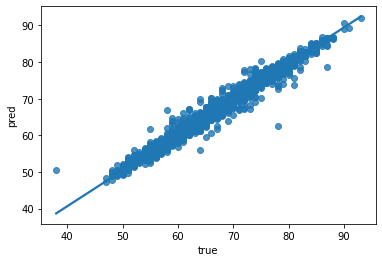

In [78]:
sns.regplot(results['true'], results['pred'])
plt.show()